In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

Eigenvalues:
 [ 6.43838584e-01  5.70782085e-03  6.21177247e-17 -8.48406396e-17]

Eigenvectors:
 [[ 0.20874182 -0.00653196  0.73244239 -0.366909  ]
 [ 0.38620369 -0.58661055 -0.05192505  0.42702466]
 [-0.55401172  0.25256154  0.00635578  0.48161485]
 [-0.7073504  -0.76945309 -0.67881628 -0.67162107]]
Projected data:
 [[ 1.49920971 -1.88675441  3.42685333]
 [ 1.2643595  -1.59214275  3.30632738]
 [ 1.35525305 -1.73341462  3.14881831]
 [ 1.18495616 -1.62358806  3.08203774]
 [ 1.5169559  -1.94476227  3.34841659]
 [ 1.40864014 -2.20148038  3.4919595 ]
 [ 1.28548339 -1.90177269  2.99794301]
 [ 1.38431399 -1.80218401  3.35943718]
 [ 1.12136823 -1.53021571  2.94529869]
 [ 1.31831374 -1.54860234  3.36965208]
 [ 1.58367182 -1.98077996  3.63683661]
 [ 1.28716445 -1.77562146  3.21358428]
 [ 1.31422036 -1.51454424  3.30096477]
 [ 1.37605297 -1.58704672  2.93283684]
 [ 1.94923317 -2.23514437  3.91232932]
 [ 1.77516687 -2.54725756  3.68445854]
 [ 1.63024483 -2.302505    3.48941719]
 [ 1.42847467 -1.96

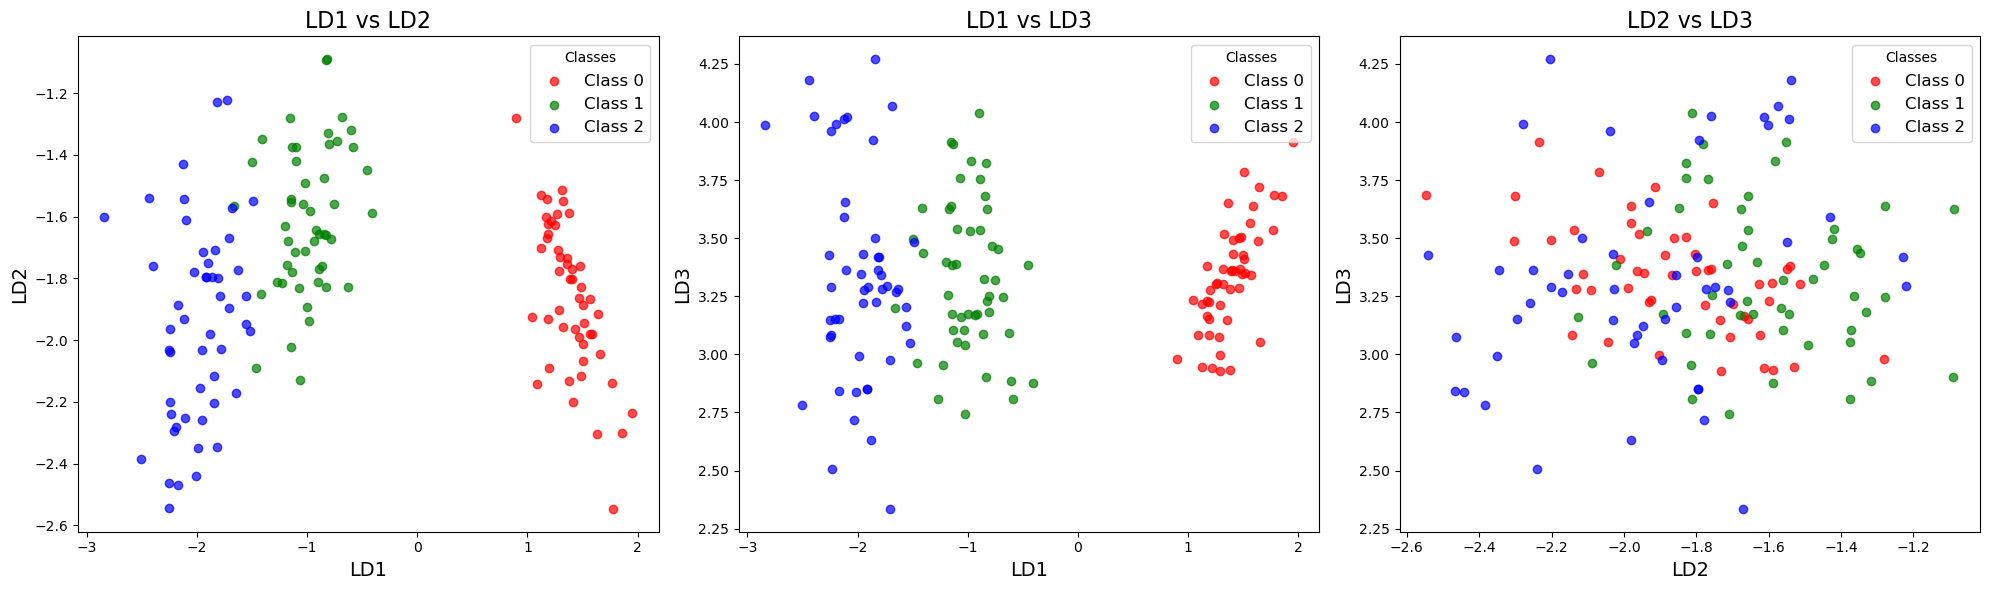

In [4]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
raw_data = data.copy()
data.insert(0, 'target', iris.target)

targets = data['target'].unique()
c1 = data[data['target'] == targets[0]].drop('target', axis=1)
c2 = data[data['target'] == targets[1]].drop('target', axis=1)
c3 = data[data['target'] == targets[2]].drop('target', axis=1)

mu_1 = c1.mean()
mu_2 = c2.mean()
mu_3 = c3.mean()

total_samples = c1.shape[0] + c2.shape[0] + c3.shape[0]
mu_tot = (mu_1 * c1.shape[0] + mu_2 * c2.shape[0] + mu_3 * c3.shape[0]) / total_samples

mu_class = pd.concat([mu_1, mu_2, mu_3], axis=1)


S_B = (mu_class - mu_tot.values.reshape(-1, 1)).dot((mu_class - mu_tot.values.reshape(-1, 1)).T)
S_W = (c1 - mu_1).T.dot(c1 - mu_1) + (c2 - mu_2).T.dot(c2 - mu_2) + (c3 - mu_3).T.dot(c3 - mu_3)


W = np.linalg.inv(S_W).dot(S_B)

eigvals, eigvecs = np.linalg.eig(W)
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
eigvecs = eigvecs[:, sorted_indices]

print("Eigenvalues:\n", eigvals)
print("\nEigenvectors:\n", eigvecs)
k  =3
#k = len(eigvals)  
W_lda = eigvecs[:, :k]


X = raw_data.values
X_lda = X.dot(W_lda)

print("Projected data:\n", X_lda)

targets = data['target']
colors = ['r', 'g', 'b']

combinations = [(0, 1), (0, 2), (1, 2)]
titles = ["LD1 vs LD2", "LD1 vs LD3", "LD2 vs LD3"]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (x_idx, y_idx) in enumerate(combinations):
    ax = axes[i]
    for target, color in zip(targets.unique(), colors):
        indices = targets == target
        ax.scatter(X_lda[indices, x_idx], X_lda[indices, y_idx], label=f'Class {target}', color=color, alpha=0.7)
    ax.set_title(titles[i], fontsize=16)
    ax.set_xlabel(f"LD{x_idx + 1}", fontsize=14)
    ax.set_ylabel(f"LD{y_idx + 1}", fontsize=14)
    ax.legend(title="Classes", fontsize=12)

plt.tight_layout()
plt.show()

